In [1]:
import numpy as np
import cv2
import os
from os import listdir
import tensorflow as tf
import pickle
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
default_image_size = tuple((256, 256))
resized_image_size = tuple((227,227))
image_size = 0
directory_root = 'E:\\PROJECT_MODIFIED\\Augmented\\Resized\\227x227'

In [4]:
# Function to convert image to array.
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, resized_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
# Reading the images from the dataset folder.
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed!")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing BANANA_DISEASED_LEAF SPOT ...
[INFO] Processing BANANA_HEALTHY ...
[INFO] Processing BLACK-PEPPER_DISEASED_ANTHRACNOSE ...
[INFO] Processing BLACK-PEPPER_HEALTHY ...
[INFO] Processing BRINJAL_DISEASED_BLIGHT ...
[INFO] Processing BRINJAL_DISEASED_COMPLEX ...
[INFO] Processing BRINJAL_DISEASED_LEAF CURL ...
[INFO] Processing BRINJAL_DISEASED_LEAF SPOT ...
[INFO] Processing BRINJAL_DISEASED_MOSAIC ...
[INFO] Processing BRINJAL_HEALTHY ...
[INFO] Processing CABBAGE_HEALTHY ...
[INFO] Processing CASAVA_HEALTHY ...
[INFO] Processing CASSAVA_DISEASED_LEAF SPOT ...
[INFO] Processing CASSAVA_DISEASED_MOSAIC ...
[INFO] Processing CHILLI-PEPPER_CHLOROSIS ...
[INFO] Processing CHILLI-PEPPER_DISEASED_LEAF CURL ...
[INFO] Processing CHILLI-PEPPER_DISEASED_LEAF SPOT ...
[INFO] Processing CHILLI-PEPPER_DISEASED_MOSIAC ...
[INFO] Processing CHILLI-PEPPER_HEALTHY ...
[INFO] Processing CITRUS_DISEASED_LEAVE SPOT ...
[INFO] Processing CITRUS_DISEASED_MITE ...
[

In [6]:
# Assign the classes to images.
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
n_classes = len(label_binarizer.classes_)

In [7]:
from collections import Counter
print(Counter(label_list).keys() )
print(Counter(label_list).values())

dict_keys(['BANANA_DISEASED_LEAF SPOT', 'BANANA_HEALTHY', 'BLACK-PEPPER_DISEASED_ANTHRACNOSE', 'BLACK-PEPPER_HEALTHY', 'BRINJAL_DISEASED_BLIGHT', 'BRINJAL_DISEASED_COMPLEX', 'BRINJAL_DISEASED_LEAF CURL', 'BRINJAL_DISEASED_LEAF SPOT', 'BRINJAL_DISEASED_MOSAIC', 'BRINJAL_HEALTHY', 'CABBAGE_HEALTHY', 'CASAVA_HEALTHY', 'CASSAVA_DISEASED_LEAF SPOT', 'CASSAVA_DISEASED_MOSAIC', 'CHILLI-PEPPER_CHLOROSIS', 'CHILLI-PEPPER_DISEASED_LEAF CURL', 'CHILLI-PEPPER_DISEASED_LEAF SPOT', 'CHILLI-PEPPER_DISEASED_MOSIAC', 'CHILLI-PEPPER_HEALTHY', 'CITRUS_DISEASED_LEAVE SPOT', 'CITRUS_DISEASED_MITE', 'CITRUS_DISEASED_MOLD', 'CITRUS_DISEASED_YELLOWING', 'CITRUS_HEALTH', 'GUAVA_DISEASED_BLIGHT', 'GUAVA_DISEASED_HEALTHY', 'GUAVA_DISEASED_LEAF SPOT', 'GUAVA_DISEASED_PEST', 'GUAVA_DISEASED_SOOTY MOLD', 'GUAVA_DISEASES_ANTHRACNOSE', 'OKRA_DISEASED_LEAF CUEL', 'OKRA_DISEASED_LEAF SPOT', 'OKRA_DISEASED_MOSAIC', 'OKRA_HEALTHY', 'PAPAYA_HEALTHY'])
dict_values([228, 198, 132, 264, 42, 186, 108, 618, 96, 1212, 498, 42, 

In [8]:
labels = len(label_binarizer.classes_)
print(labels)

35


In [9]:
# Convert the array to a NumPy list and normalise it.
np_image_list = np.array(image_list, dtype = np.float16) / 225.0
print("Total Images" , " : " ,len(np_image_list))
del image_list

Total Images  :  11064


In [10]:
print("[INFO] Spliting data into train set and test set ...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size = 0.2, random_state = 42) 
print("[INFO] Spliting complete!")
print("x_Train" ," : " , len(x_train))
print("y_Train" ," : " , len(y_train))
print("x_Test" ," : " , len(x_test))
print("y_Test" ," : " , len(y_test))
del np_image_list
del image_labels

[INFO] Spliting data into train set and test set ...
[INFO] Spliting complete!
x_Train  :  8851
y_Train  :  8851
x_Test  :  2213
y_Test  :  2213


In [11]:
aug = ImageDataGenerator()

In [12]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import os, gc, sys, glob
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model, load_model
from keras import applications
from keras.callbacks import ReduceLROnPlateau

from keras.layers import LayerNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [13]:
img_rows, img_cols, img_channel = 227,227, 3

base_model =tf.keras.applications.EfficientNetV2S(
    include_top=False,
    input_shape=(img_rows, img_cols, img_channel),
    pooling='avg',
)

print(base_model.summary())


Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 227, 227, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 114, 114, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

 block2c_expand_activation (Act  (None, 57, 57, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 57, 57, 48)   9216        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 57, 57, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_drop (Dropout)         (None, 57, 57, 48)   0           ['block2c_project_bn[0][0]']     
          

                                                                  'block3b_add[0][0]']            
                                                                                                  
 block3d_expand_conv (Conv2D)   (None, 29, 29, 256)  147456      ['block3c_add[0][0]']            
                                                                                                  
 block3d_expand_bn (BatchNormal  (None, 29, 29, 256)  1024       ['block3d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3d_expand_activation (Act  (None, 29, 29, 256)  0          ['block3d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3d_p

                                                                                                  
 block4b_project_conv (Conv2D)  (None, 15, 15, 128)  65536       ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 15, 15, 128)  512        ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 15, 15, 128)  0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 15, 15, 128)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
          

                                                                                                  
 block4d_drop (Dropout)         (None, 15, 15, 128)  0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 15, 15, 128)  0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 15, 15, 512)  65536       ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 15, 15, 512)  2048       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5a_expand_conv (Conv2D)   (None, 15, 15, 768)  98304       ['block4f_add[0][0]']            
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, 15, 15, 768)  3072       ['block5a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 15, 15, 768)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv2 (DepthwiseConv  (None, 15, 15, 768)  6912       ['block5a_expand_activation[0][0]
 2D)      

 2D)                                                             ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, 15, 15, 960)  3840       ['block5c_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5c_activation (Activation  (None, 15, 15, 960)  0          ['block5c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 960)         0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5e_activation (Activation  (None, 15, 15, 960)  0          ['block5e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 960)         0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_s

                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 15, 15, 960)  0           ['block5g_activation[0][0]',     
                                                                  'block5g_se_expand[0][0]']      
                                                                                                  
 block5g_p

 block5i_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5i_se_reduce[0][0]']      
                                                                                                  
 block5i_se_excite (Multiply)   (None, 15, 15, 960)  0           ['block5i_activation[0][0]',     
                                                                  'block5i_se_expand[0][0]']      
                                                                                                  
 block5i_project_conv (Conv2D)  (None, 15, 15, 160)  153600      ['block5i_se_excite[0][0]']      
                                                                                                  
 block5i_project_bn (BatchNorma  (None, 15, 15, 160)  640        ['block5i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5i_d

 block6b_drop (Dropout)         (None, 8, 8, 256)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 8, 8, 256)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 8, 8, 1536)   393216      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 8, 8, 1536)  6144        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_e

 block6e_expand_conv (Conv2D)   (None, 8, 8, 1536)   393216      ['block6d_add[0][0]']            
                                                                                                  
 block6e_expand_bn (BatchNormal  (None, 8, 8, 1536)  6144        ['block6e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6e_expand_activation (Act  (None, 8, 8, 1536)  0           ['block6e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6e_dwconv2 (DepthwiseConv  (None, 8, 8, 1536)  13824       ['block6e_expand_activation[0][0]
 2D)                                                             ']                               
          

 block6g_expand_activation (Act  (None, 8, 8, 1536)  0           ['block6g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6g_dwconv2 (DepthwiseConv  (None, 8, 8, 1536)  13824       ['block6g_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6g_bn (BatchNormalization  (None, 8, 8, 1536)  6144        ['block6g_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6g_activation (Activation  (None, 8, 8, 1536)  0           ['block6g_bn[0][0]']             
 )        

                                                                                                  
 block6i_bn (BatchNormalization  (None, 8, 8, 1536)  6144        ['block6i_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6i_activation (Activation  (None, 8, 8, 1536)  0           ['block6i_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 1536)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6i_s

 )                                                                                                
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 1536)        0           ['block6k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6k_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6k_se_squeeze[0][0]']     
                                                                                                  
 block6k_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6k_se_reshape[0][0]']     
                                                                                                  
 block6k_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6k_se_reduce[0][0]']      
          

 block6m_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6m_se_squeeze[0][0]']     
                                                                                                  
 block6m_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6m_se_reshape[0][0]']     
                                                                                                  
 block6m_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6m_se_reduce[0][0]']      
                                                                                                  
 block6m_se_excite (Multiply)   (None, 8, 8, 1536)   0           ['block6m_activation[0][0]',     
                                                                  'block6m_se_expand[0][0]']      
                                                                                                  
 block6m_project_conv (Conv2D)  (None, 8, 8, 256)    393216      ['block6m_se_excite[0][0]']      
          

                                                                                                  
 block6o_se_excite (Multiply)   (None, 8, 8, 1536)   0           ['block6o_activation[0][0]',     
                                                                  'block6o_se_expand[0][0]']      
                                                                                                  
 block6o_project_conv (Conv2D)  (None, 8, 8, 256)    393216      ['block6o_se_excite[0][0]']      
                                                                                                  
 block6o_project_bn (BatchNorma  (None, 8, 8, 256)   1024        ['block6o_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6o_drop (Dropout)         (None, 8, 8, 256)    0           ['block6o_project_bn[0][0]']     
          

In [14]:
outputs = tf.keras.layers.Dense(labels, activation='softmax')(base_model.output)
model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

In [15]:
EPOCHS = 100
INIT_LR = 1e-4
Decay = 1e-5

# compile the model
opt = opt = tf.keras.optimizers.Adam(learning_rate=INIT_LR)

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

print("[INFO] Training network...")

# Train
checkpoint = ModelCheckpoint("OD_ENV2S_AD.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'max')


history = model.fit(
    aug.flow(x_train, y_train, shuffle = False),
    validation_data = (x_test, y_test),
    validation_freq=1,
    batch_size = 32,
    callbacks = [checkpoint],
    epochs = EPOCHS,)

[INFO] Training network...
Epoch 1/100
277/277 [==============================] - ETA: 0s - loss: 1.6126 - accuracy: 0.5802
Epoch 1: val_accuracy improved from -inf to 0.82648, saving model to OD_ENV2S_AD.h5
277/277 [==============================] - 145s 433ms/step - loss: 1.6126 - accuracy: 0.5802 - val_loss: 0.6040 - val_accuracy: 0.8265
Epoch 2/100
277/277 [==============================] - ETA: 0s - loss: 0.4506 - accuracy: 0.8642
Epoch 2: val_accuracy improved from 0.82648 to 0.91279, saving model to OD_ENV2S_AD.h5
277/277 [==============================] - 105s 379ms/step - loss: 0.4506 - accuracy: 0.8642 - val_loss: 0.2765 - val_accuracy: 0.9128
Epoch 3/100
277/277 [==============================] - ETA: 0s - loss: 0.1648 - accuracy: 0.9564
Epoch 3: val_accuracy improved from 0.91279 to 0.94623, saving model to OD_ENV2S_AD.h5
277/277 [==============================] - 105s 379ms/step - loss: 0.1648 - accuracy: 0.9564 - val_loss: 0.1856 - val_accuracy: 0.9462
Epoch 4/100
277/277

277/277 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9969
Epoch 28: val_accuracy did not improve from 0.97876
277/277 [==============================] - 103s 372ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.1182 - val_accuracy: 0.9738
Epoch 29/100
277/277 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9946
Epoch 29: val_accuracy did not improve from 0.97876
277/277 [==============================] - 103s 372ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.1655 - val_accuracy: 0.9616
Epoch 30/100
277/277 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9953
Epoch 30: val_accuracy did not improve from 0.97876
277/277 [==============================] - 103s 372ms/step - loss: 0.0168 - accuracy: 0.9953 - val_loss: 0.1162 - val_accuracy: 0.9720
Epoch 31/100
277/277 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9964
Epoch 31: val_accuracy did not improve from 0.97876
277/277 

277/277 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9979
Epoch 56: val_accuracy did not improve from 0.98690
277/277 [==============================] - 103s 372ms/step - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.1186 - val_accuracy: 0.9779
Epoch 57/100
277/277 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983
Epoch 57: val_accuracy did not improve from 0.98690
277/277 [==============================] - 103s 372ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.1220 - val_accuracy: 0.9756
Epoch 58/100
277/277 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9985
Epoch 58: val_accuracy did not improve from 0.98690
277/277 [==============================] - 103s 372ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0857 - val_accuracy: 0.9797
Epoch 59/100
277/277 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9989
Epoch 59: val_accuracy did not improve from 0.98690
277/277 

277/277 [==============================] - 103s 372ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0666 - val_accuracy: 0.9851
Epoch 85/100
277/277 [==============================] - ETA: 0s - loss: 9.8509e-04 - accuracy: 0.9998
Epoch 85: val_accuracy did not improve from 0.98825
277/277 [==============================] - 103s 372ms/step - loss: 9.8509e-04 - accuracy: 0.9998 - val_loss: 0.0651 - val_accuracy: 0.9846
Epoch 86/100
277/277 [==============================] - ETA: 0s - loss: 2.7460e-04 - accuracy: 1.0000
Epoch 86: val_accuracy did not improve from 0.98825
277/277 [==============================] - 103s 372ms/step - loss: 2.7460e-04 - accuracy: 1.0000 - val_loss: 0.0613 - val_accuracy: 0.9873
Epoch 87/100
277/277 [==============================] - ETA: 0s - loss: 1.9468e-04 - accuracy: 1.0000
Epoch 87: val_accuracy did not improve from 0.98825
277/277 [==============================] - 103s 372ms/step - loss: 1.9468e-04 - accuracy: 1.0000 - val_loss: 0.0621 - val_acc

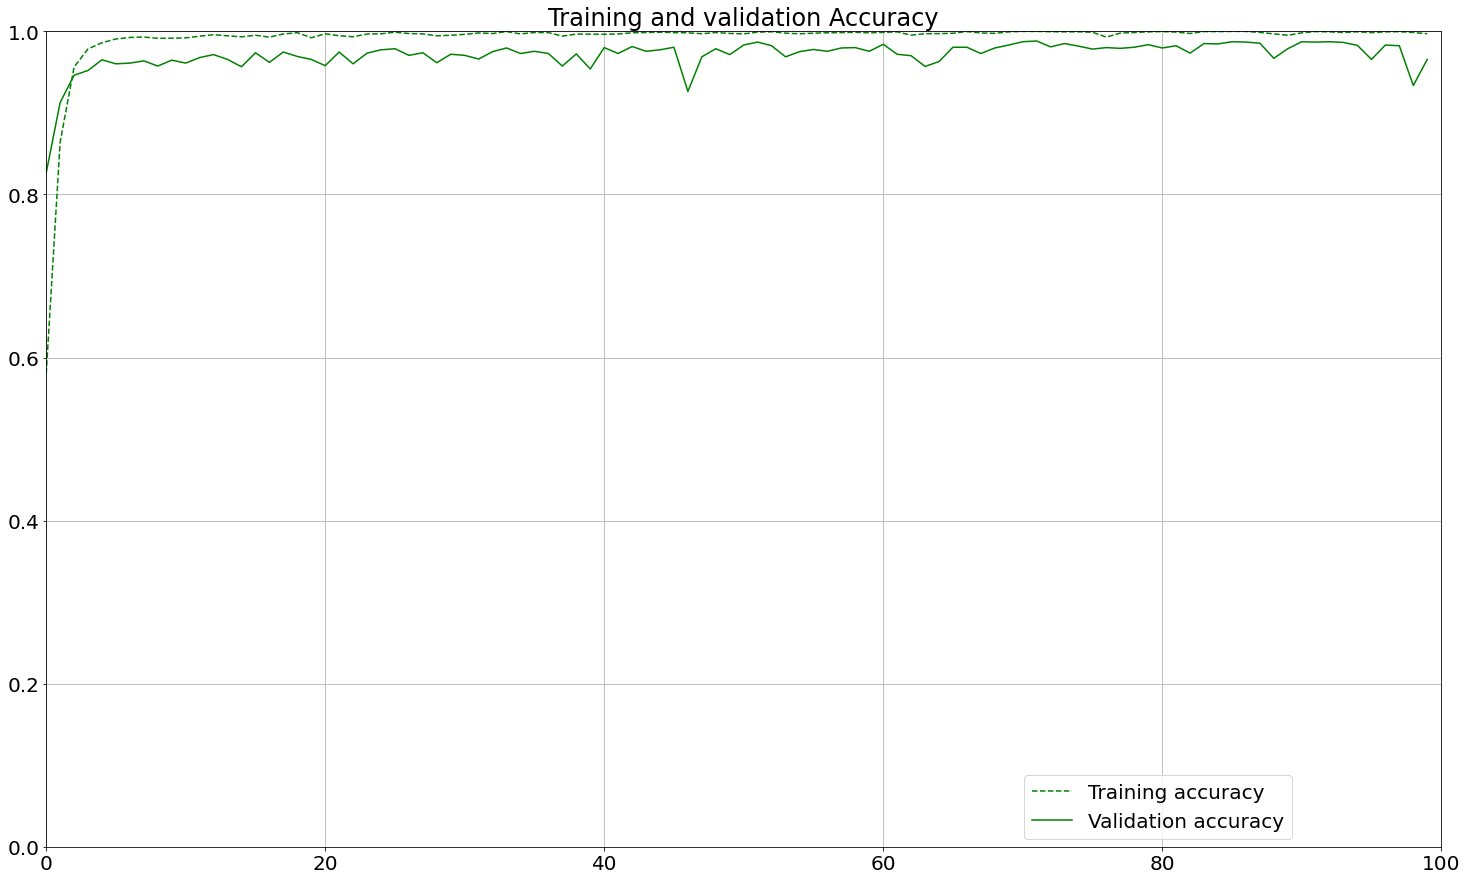

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(25, 15))
xmin = 0
xmax = 100
ymin = 0.0
ymax = 1.0
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
    
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

plt.plot(epochs, acc, 'g--', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'g', label = 'Validation accuracy')
plt.title('Training and validation Accuracy')
plt.legend(bbox_to_anchor=(0.9, 0.1))

plt.grid()
plt.show()

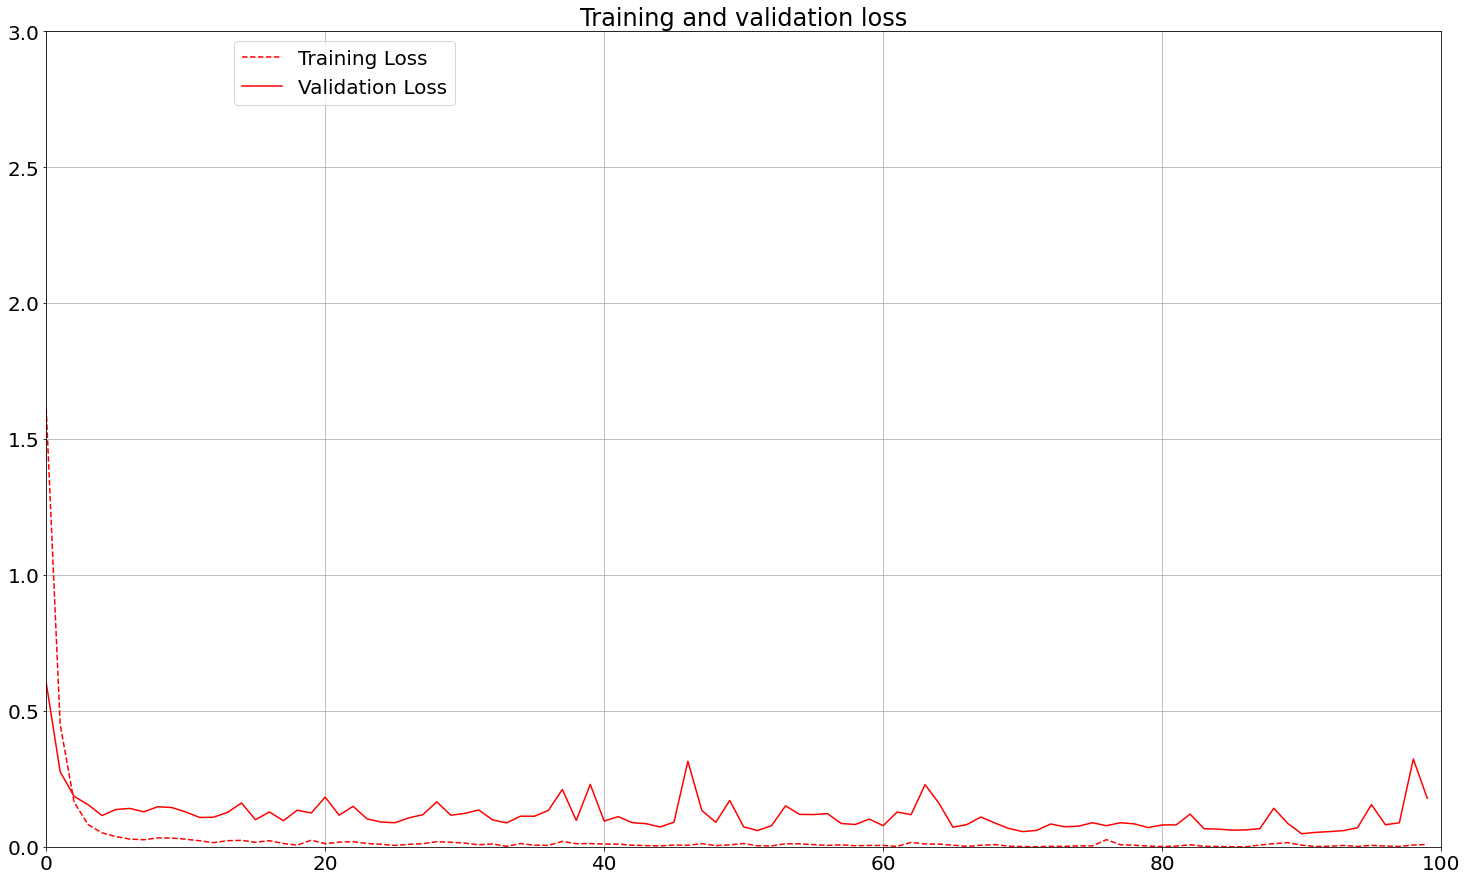

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(25, 15))
    #Plot the Result
xmin = 0
xmax = 100
ymin = 0.0
ymax = 3.0

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
    
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

plt.plot(epochs, loss, 'r--', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend(bbox_to_anchor=(0.3, 1))

plt.grid()
plt.show()

In [18]:
model = load_model("OD_ENV2S_AD.h5")
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
70/70 [==============================] - 9s 93ms/step - loss: 0.0604 - accuracy: 0.9883
Test Accuracy: 98.8251268863678
